In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get the data

In [2]:
import os
import pandas as pd

DATASET_PATH = os.path.join("./datasets", "heart_attack_dataset")

def load_data(path=DATASET_PATH):
    csv_path = os.path.join(path, "Heart_Attack_Analysis_Data.csv")
    return pd.read_csv(csv_path)

In [3]:
heart_condition = load_data()
heart_condition.head()

,Age,Sex,CP_Type,BloodPressure,Cholestrol,BloodSugar,ECG,MaxHeartRate,ExerciseAngina,FamilyHistory,Target
0,63,1,3,145,233,1,0,150,0,2,1
1,37,1,2,130,250,0,1,187,0,1,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,1,1
4,57,0,0,120,354,0,1,163,1,0,1


In [4]:
heart_condition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             303 non-null    int64
 1   Sex             303 non-null    int64
 2   CP_Type         303 non-null    int64
 3   BloodPressure   303 non-null    int64
 4   Cholestrol      303 non-null    int64
 5   BloodSugar      303 non-null    int64
 6   ECG             303 non-null    int64
 7   MaxHeartRate    303 non-null    int64
 8   ExerciseAngina  303 non-null    int64
 9   FamilyHistory   303 non-null    int64
 10  Target          303 non-null    int64
dtypes: int64(11)
memory usage: 26.2 KB


In [5]:
heart_condition.describe()

,Age,Sex,CP_Type,BloodPressure,Cholestrol,BloodSugar,ECG,MaxHeartRate,ExerciseAngina,FamilyHistory,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.204620,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.096825,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,1.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.000000,1.000000


# Data Pre-processing

In [6]:
# 1. Count of null values in dataset
heart_condition.isnull().sum()

Age               0
Sex               0
CP_Type           0
BloodPressure     0
Cholestrol        0
BloodSugar        0
ECG               0
MaxHeartRate      0
ExerciseAngina    0
FamilyHistory     0
Target            0
dtype: int64

In [7]:
# Changing ECG=2 to ECG=1
heart_condition.loc[heart_condition['ECG'] == 2, 'ECG'] = 1
heart_condition.describe()

,Age,Sex,CP_Type,BloodPressure,Cholestrol,BloodSugar,ECG,MaxHeartRate,ExerciseAngina,FamilyHistory,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.514851,149.646865,0.326733,1.204620,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.500606,22.905161,0.469794,1.096825,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,1.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,1.000000,202.000000,1.000000,5.000000,1.000000


In [8]:
# 2. Typecast to Categorical columns in pandas
heart_condition['Sex'] = pd.Categorical(heart_condition.Sex)
heart_condition['CP_Type'] = pd.Categorical(heart_condition.CP_Type)
heart_condition['BloodSugar'] = pd.Categorical(heart_condition.BloodSugar)
heart_condition['ECG'] = pd.Categorical(heart_condition.ECG)
heart_condition['ExerciseAngina'] = pd.Categorical(heart_condition.ExerciseAngina)
heart_condition.dtypes

Age                  int64
Sex               category
CP_Type           category
BloodPressure        int64
Cholestrol           int64
BloodSugar        category
ECG               category
MaxHeartRate         int64
ExerciseAngina    category
FamilyHistory        int64
Target               int64
dtype: object

In [9]:
# 3. One hot encoding of CP_Type
one_hot_encoded_data=pd.get_dummies(heart_condition, columns=['CP_Type'])
print(one_hot_encoded_data)
heart_condition=one_hot_encoded_data

     Age Sex  BloodPressure  Cholestrol BloodSugar ECG  MaxHeartRate  \
0     63   1            145         233          1   0           150   
1     37   1            130         250          0   1           187   
2     41   0            130         204          0   0           172   
3     56   1            120         236          0   1           178   
4     57   0            120         354          0   1           163   
..   ...  ..            ...         ...        ...  ..           ...   
298   57   0            140         241          0   1           123   
299   45   1            110         264          0   1           132   
300   68   1            144         193          1   1           141   
301   57   1            130         131          0   1           115   
302   57   0            130         236          0   0           174   

    ExerciseAngina  FamilyHistory  Target  CP_Type_0  CP_Type_1  CP_Type_2  \
0                0              2       1          0     

In [10]:
heart_condition['CP_Type_0'] = pd.Categorical(heart_condition.CP_Type_0)
heart_condition['CP_Type_1'] = pd.Categorical(heart_condition.CP_Type_1)
heart_condition['CP_Type_2'] = pd.Categorical(heart_condition.CP_Type_2)
heart_condition['CP_Type_3'] = pd.Categorical(heart_condition.CP_Type_3)
heart_condition['Target'] = pd.Categorical(heart_condition.Target)
heart_condition.drop_duplicates()
heart_condition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             303 non-null    int64   
 1   Sex             303 non-null    category
 2   BloodPressure   303 non-null    int64   
 3   Cholestrol      303 non-null    int64   
 4   BloodSugar      303 non-null    category
 5   ECG             303 non-null    category
 6   MaxHeartRate    303 non-null    int64   
 7   ExerciseAngina  303 non-null    category
 8   FamilyHistory   303 non-null    int64   
 9   Target          303 non-null    category
 10  CP_Type_0       303 non-null    category
 11  CP_Type_1       303 non-null    category
 12  CP_Type_2       303 non-null    category
 13  CP_Type_3       303 non-null    category
dtypes: category(9), int64(5)
memory usage: 15.7 KB


# Data Summarization

In [11]:
# Summarization of normalized data
heart_condition.describe()

,Age,BloodPressure,Cholestrol,MaxHeartRate,FamilyHistory
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.204620
std,9.082101,17.538143,51.830751,22.905161,1.096825
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,5.000000


In [12]:
#Cholestrol Outliers
Chol_Q1=heart_condition['Cholestrol'].quantile(0.25)
Chol_Q3=heart_condition['Cholestrol'].quantile(0.75)
Chol_IQR=Chol_Q3-Chol_Q1
print("Cholestrol IQR =",Chol_IQR)
Outlier_Low=Chol_Q1-1.5*Chol_IQR
Outlier_High=Chol_Q1+1.5*Chol_IQR                                                
print("Values of Cholestrol outside the range (",Outlier_Low,",",Outlier_High,") are outliers")                                                

#MaxHeartRate Outliers
MHR_Q1=heart_condition['MaxHeartRate'].quantile(0.25)
MHR_Q3=heart_condition['MaxHeartRate'].quantile(0.75)
MHR_IQR=MHR_Q3-MHR_Q1
print("MaxHeartRate IQR =",MHR_IQR)
Outlier_Low=MHR_Q1-1.5*MHR_IQR
Outlier_High=MHR_Q1+1.5*MHR_IQR                                                
print("Values of MaxHeartRate outside the range (",Outlier_Low,",",Outlier_High,") are outliers")                                 

Cholestrol IQR = 63.5
Values of Cholestrol outside the range ( 115.75 , 306.25 ) are outliers
MaxHeartRate IQR = 32.5
Values of MaxHeartRate outside the range ( 84.75 , 182.25 ) are outliers


In [13]:
# Multi-index pivot table
table=pd.pivot_table(heart_condition,index=['Sex', 'Target'])
table

Age  BloodPressure  Cholestrol  FamilyHistory  MaxHeartRate
Sex Target                                                                   
0   0       59.041667     146.125000  274.958333       1.041667    142.416667
    1       54.555556     128.736111  256.750000       1.277778    154.027778
1   0       56.087719     131.929825  246.061404       1.280702    138.403509
    1       50.903226     129.741935  230.989247       1.096774    161.903226

# Observations from summarized data

# Attribute selection for model building

In [ ]:
Identification of relevant, irrelevant attributes for building model

In [14]:
heart_condition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             303 non-null    int64   
 1   Sex             303 non-null    category
 2   BloodPressure   303 non-null    int64   
 3   Cholestrol      303 non-null    int64   
 4   BloodSugar      303 non-null    category
 5   ECG             303 non-null    category
 6   MaxHeartRate    303 non-null    int64   
 7   ExerciseAngina  303 non-null    category
 8   FamilyHistory   303 non-null    int64   
 9   Target          303 non-null    category
 10  CP_Type_0       303 non-null    category
 11  CP_Type_1       303 non-null    category
 12  CP_Type_2       303 non-null    category
 13  CP_Type_3       303 non-null    category
dtypes: category(9), int64(5)
memory usage: 15.7 KB


# For numerical features and categorical output (Target), we use ANOVA.

In [15]:
!pip install researchpy

In [16]:
#ANOVA for numerical features vs Target:
import researchpy as rp
heart_condition['Target'].replace({0: 'LESS CHANCE', 1: 'MORE CHANCE'}, inplace= True)
heart_condition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             303 non-null    int64   
 1   Sex             303 non-null    category
 2   BloodPressure   303 non-null    int64   
 3   Cholestrol      303 non-null    int64   
 4   BloodSugar      303 non-null    category
 5   ECG             303 non-null    category
 6   MaxHeartRate    303 non-null    int64   
 7   ExerciseAngina  303 non-null    category
 8   FamilyHistory   303 non-null    int64   
 9   Target          303 non-null    object  
 10  CP_Type_0       303 non-null    category
 11  CP_Type_1       303 non-null    category
 12  CP_Type_2       303 non-null    category
 13  CP_Type_3       303 non-null    category
dtypes: category(8), int64(5), object(1)
memory usage: 17.7+ KB


In [17]:
rp.summary_cont(heart_condition['Age'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Age,303.0,54.3663,9.0821,0.5218,53.3396,55.3931


In [18]:
rp.summary_cont(heart_condition['Age'].groupby(heart_condition['Target']))

,N,Mean,SD,SE,95% Conf.,Interval
Target,,,,,,
LESS CHANCE,138,56.6014,7.9621,0.6778,55.2612,57.9417
MORE CHANCE,165,52.4970,9.5507,0.7435,51.0289,53.9651


In [19]:
import scipy.stats as stats

stats.f_oneway(heart_condition['Age'][heart_condition['Target'] == 'LESS CHANCE'],
               heart_condition['Age'][heart_condition['Target'] == 'MORE CHANCE'])

F_onewayResult(statistic=16.116699823188288, pvalue=7.524801303442268e-05)

# Age is a relevant attribute

In [ ]:
Hypothesis H0: Means of both distributions (less chance/more chance of heart attack) are same; H1: Means of both distributions (less chance/more chance of heart attack) are significantly different

As p-value is less than 0.05 (for 95% confidence), H0 is rejected and H1 is accepted. There is a statistically significant difference between the groups (less chance/more chance of heart attack) and their effects due to the variable age as, F= 16.116699823188288, pvalue=7.524801303442268e-05.

Thus, age is a relevant attribute.

In [20]:
rp.summary_cont(heart_condition['BloodPressure'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,BloodPressure,303.0,131.6238,17.5381,1.0075,129.6411,133.6065


In [21]:
stats.f_oneway(heart_condition['BloodPressure'][heart_condition['Target'] == 'LESS CHANCE'],
               heart_condition['BloodPressure'][heart_condition['Target'] == 'MORE CHANCE'])

F_onewayResult(statistic=6.458168674005333, pvalue=0.011546059200233376)

# BloodPressure is a relevant attribute

Hypothesis H0: Means of both distributions (less chance/more chance of heart attack) are same; H1: Means of both distributions (less chance/more chance of heart attack) are significantly different

As p-value is less than 0.05 (for 95% confidence), H0 is rejected and H1 is accepted. There is a statistically significant difference between the groups (less chance/more chance of heart attack) and their effects due to the variable BloodPressure as, F= 6.458168674005333, pvalue=0.011546059200233376.

Thus, BloodPressure is a relevant attribute.

In [22]:
rp.summary_cont(heart_condition['Cholestrol'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Cholestrol,303.0,246.264,51.8308,2.9776,240.4046,252.1235


In [23]:
stats.f_oneway(heart_condition['Cholestrol'][heart_condition['Target'] == 'LESS CHANCE'],
               heart_condition['Cholestrol'][heart_condition['Target'] == 'MORE CHANCE'])

F_onewayResult(statistic=2.2029834463803746, pvalue=0.1387903269560108)

# Cholestrol is an irrelevant attribute

Hypothesis H0: Means of both distributions (less chance/more chance of heart attack) are same; H1: Means of both distributions (less chance/more chance of heart attack) are significantly different

As p-value is greater than 0.05 (for 95% confidence), H0 is accepted and H1 is rejected. There is no statistically significant difference between the groups (less chance/more chance of heart attack) and their effects due to the variable cholestrol as, F= 2.2029834463803746, pvalue=0.1387903269560108.

Thus, Cholestrol is an irrelevant attribute.


In [24]:
rp.summary_cont(heart_condition['MaxHeartRate'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,MaxHeartRate,303.0,149.6469,22.9052,1.3159,147.0574,152.2363


In [25]:
stats.f_oneway(heart_condition['MaxHeartRate'][heart_condition['Target'] == 'LESS CHANCE'],
               heart_condition['MaxHeartRate'][heart_condition['Target'] == 'MORE CHANCE'])

F_onewayResult(statistic=65.12010440125097, pvalue=1.6973376386560805e-14)

# MaxHeartRate is a relevant attribute

Hypothesis H0: Means of both distributions (less chance/more chance of heart attack) are same; H1: Means of both distributions (less chance/more chance of heart attack) are significantly different

As p-value is less than 0.05 (for 95% confidence), H0 is accepted and H1 is rejected. There is statistically significant difference between the groups (less chance/more chance of heart attack) and their effects due to the variable MaxHeartRate as, F= 65.12010440125097, pvalue=1.6973376386560805e-14.

Thus, MaxHeartRate is a relevant attribute.

In [26]:
rp.summary_cont(heart_condition['FamilyHistory'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,FamilyHistory,303.0,1.2046,1.0968,0.063,1.0806,1.3286


In [27]:
stats.f_oneway(heart_condition['FamilyHistory'][heart_condition['Target'] == 'LESS CHANCE'],
               heart_condition['FamilyHistory'][heart_condition['Target'] == 'MORE CHANCE'])

F_onewayResult(statistic=0.25024928475305025, pvalue=0.6172651404419242)

# FamilyHistory is an irrelevant attribute

# For categorical features and categorical output (Target), we to convert the categorical features into numerical features and find correlation using Pearson's correlation.

The categorical features** include:

Sex
BloodSugar
ECG
ExerciseAngina
CP_Type_0
CP_Type_1
CP_Type_2
CP_Type_3
**All these features are binary categorical features with 0 or 1 values.

In [28]:
import numpy as np
from scipy.stats import pearsonr

heart_condition['Target'].replace({'LESS CHANCE':0, 'MORE CHANCE':1}, inplace= True)
heart_condition['Sex'].replace({'0':0, '1':1}, inplace= True)
corr,_=pearsonr(heart_condition['Target'],heart_condition['Sex'])
print("Pearson's Correlation for Sex and Target:", corr)

Pearson's Correlation for Sex and Target: -0.2809365755017672


In [29]:
heart_condition['BloodSugar'].replace({'0':0, '1':1}, inplace= True)
corr,_=pearsonr(heart_condition['Target'],heart_condition['BloodSugar'])
print("Pearson's Correlation for BloodSugar and Target:", corr)

Pearson's Correlation for BloodSugar and Target: -0.02804576027271293


In [30]:
heart_condition['ECG'].replace({'0':0, '1':1}, inplace= True)
corr,_=pearsonr(heart_condition['Target'],heart_condition['ECG'])
print("Pearson's Correlation for ECG and Target:", corr)

Pearson's Correlation for ECG and Target: 0.15977519309753493


In [31]:
heart_condition['ExerciseAngina'].replace({'0':0, '1':1}, inplace= True)
corr,_=pearsonr(heart_condition['Target'],heart_condition['ExerciseAngina'])
print("Pearson's Correlation for ExerciseAngina and Target:", corr)

Pearson's Correlation for ExerciseAngina and Target: -0.4367570833533034


In [32]:
heart_condition['CP_Type_0'].replace({'0':0, '1':1}, inplace= True)
corr,_=pearsonr(heart_condition['Target'],heart_condition['CP_Type_0'])
print("Pearson's Correlation for CP_Type_0 and Target:", corr)

Pearson's Correlation for CP_Type_0 and Target: -0.516014641568059


In [33]:
heart_condition['CP_Type_1'].replace({'0':0, '1':1}, inplace= True)
corr,_=pearsonr(heart_condition['Target'],heart_condition['CP_Type_1'])
print("Pearson's Correlation for CP_Type_1 and Target:", corr)

Pearson's Correlation for CP_Type_1 and Target: 0.24587909539147848


In [34]:
heart_condition['CP_Type_2'].replace({'0':0, '1':1}, inplace= True)
corr,_=pearsonr(heart_condition['Target'],heart_condition['CP_Type_2'])
print("Pearson's Correlation for CP_Type_0 and Target:", corr)

Pearson's Correlation for CP_Type_0 and Target: 0.31674215819553925


In [35]:
heart_condition['CP_Type_3'].replace({'0':0, '1':1}, inplace= True)
corr,_=pearsonr(heart_condition['Target'],heart_condition['CP_Type_3'])
print("Pearson's Correlation for CP_Type_0 and Target:", corr)

Pearson's Correlation for CP_Type_0 and Target: 0.08695687464637579


Saving figure attribute_histogram_plots


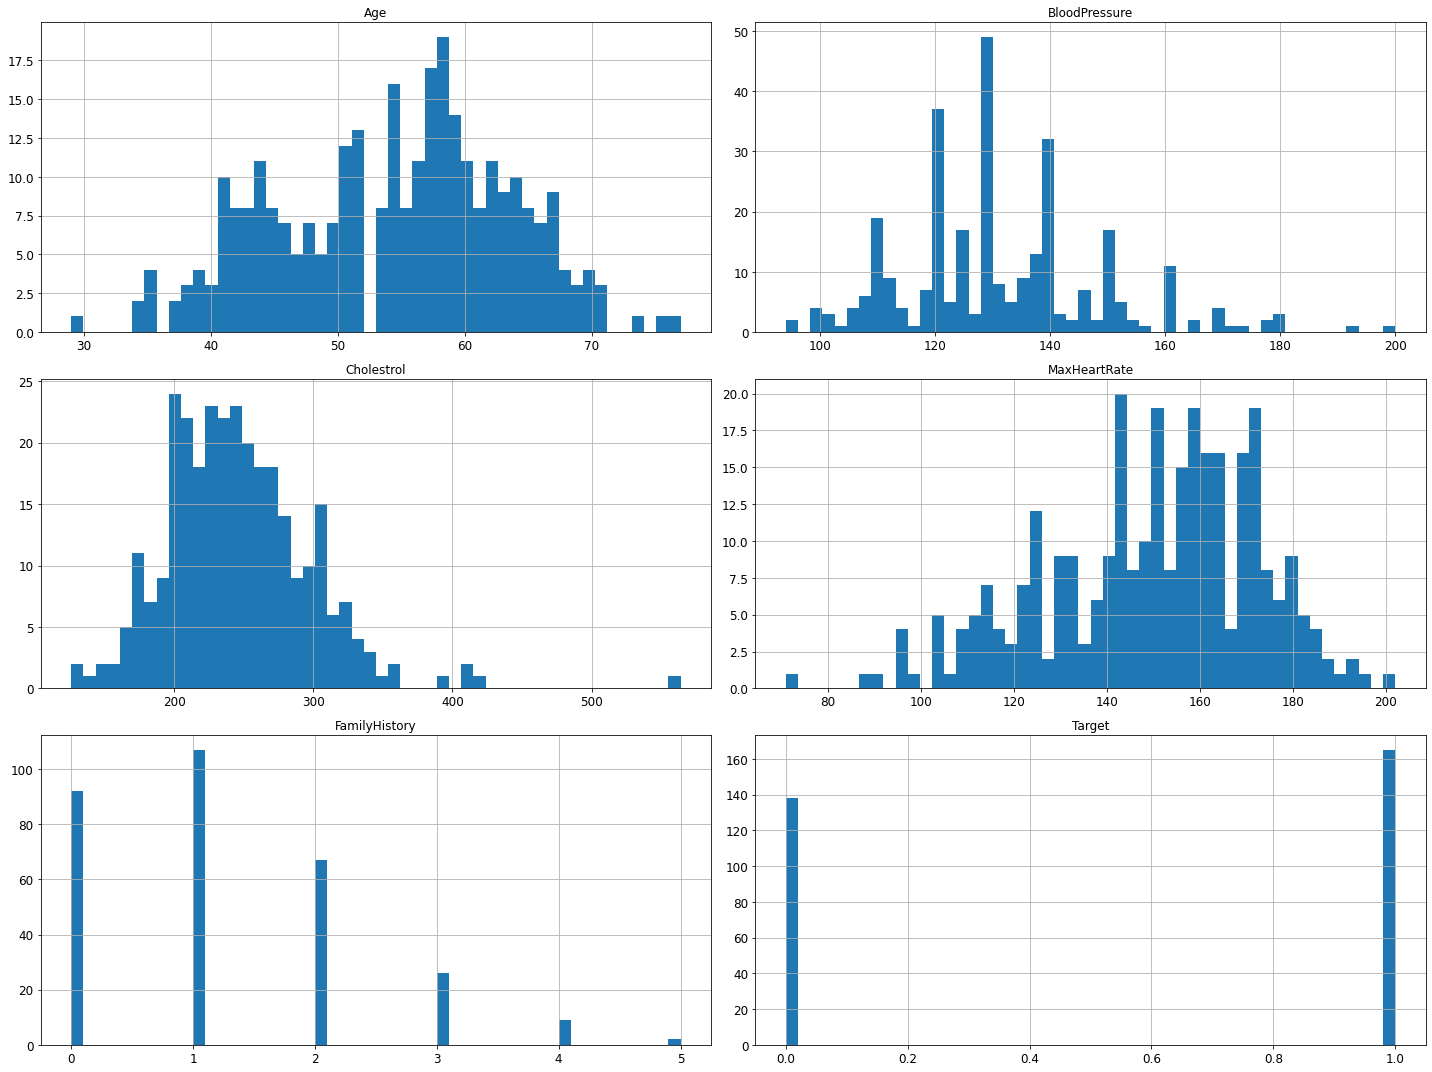

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
heart_condition.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

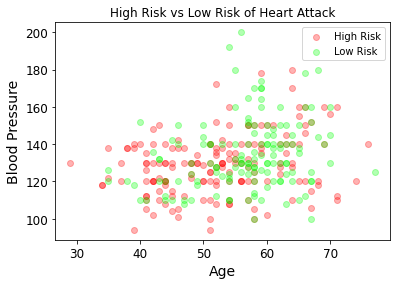

In [37]:
H = heart_condition[heart_condition.Target == 1]
L = heart_condition[heart_condition.Target == 0]
plt.title("High Risk vs Low Risk of Heart Attack")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.scatter(H.Age, H.BloodPressure, color = "red", label = "High Risk", alpha = 0.3)
plt.scatter(L.Age, L.BloodPressure, color = "lime", label = "Low Risk", alpha = 0.3)
plt.legend()
plt.show()

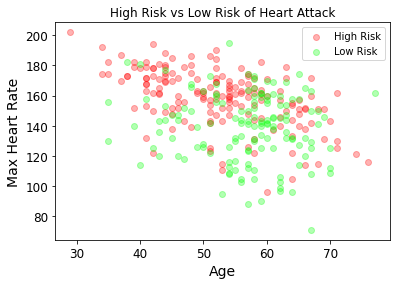

In [38]:
plt.title("High Risk vs Low Risk of Heart Attack")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.scatter(H.Age, H.MaxHeartRate, color = "red", label = "High Risk", alpha = 0.3)
plt.scatter(L.Age, L.MaxHeartRate, color = "lime", label = "Low Risk", alpha = 0.3)
plt.legend()
plt.show()

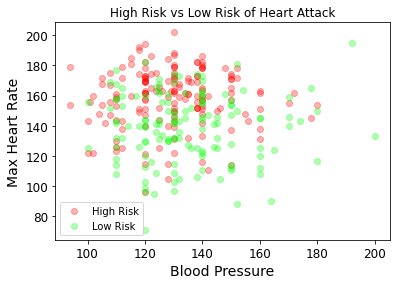

In [39]:
plt.title("High Risk vs Low Risk of Heart Attack")
plt.xlabel("Blood Pressure")
plt.ylabel("Max Heart Rate")
plt.scatter(H.BloodPressure, H.MaxHeartRate, color = "red", label = "High Risk", alpha = 0.3)
plt.scatter(L.BloodPressure, L.MaxHeartRate, color = "lime", label = "Low Risk", alpha = 0.3)
plt.legend()
plt.show()

# Observations

In [40]:
import scipy
import numpy
import sklearn
from sklearn.preprocessing import MinMaxScaler

# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalization using min-max normalization
scaled_features = scaler.fit_transform(heart_condition.values)
heart_condition = pd.DataFrame(scaled_features, index=heart_condition.index, columns=heart_condition.columns)
heart_condition.head()

,Age,Sex,BloodPressure,Cholestrol,BloodSugar,ECG,MaxHeartRate,ExerciseAngina,FamilyHistory,Target,CP_Type_0,CP_Type_1,CP_Type_2,CP_Type_3
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.4,1.0,0.0,0.0,0.0,1.0
1,0.166667,1.0,0.339623,0.283105,0.0,1.0,0.885496,0.0,0.2,1.0,0.0,0.0,1.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.562500,1.0,0.245283,0.251142,0.0,1.0,0.816794,0.0,0.2,1.0,0.0,1.0,0.0,0.0
4,0.583333,0.0,0.245283,0.520548,0.0,1.0,0.702290,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [41]:
from sklearn.model_selection import train_test_split
# separate array into input and output components
X = heart_condition.iloc[:, [0,2,6,7,10]].values
y = heart_condition.iloc[:, 9].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [42]:
len(X_train)


242

In [43]:
len(X_test)


61

In [44]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [45]:
probs_log1=clf.predict_proba(X_test)
print(probs_log1)

[[9.92931270e-01 7.06872992e-03]
 [2.44729513e-01 7.55270487e-01]
 [2.07763498e-01 7.92236502e-01]
 [9.77954702e-01 2.20452984e-02]
 [1.03695939e-01 8.96304061e-01]
 [2.65716031e-01 7.34283969e-01]
 [9.73654704e-01 2.63452955e-02]
 [6.26281947e-01 3.73718053e-01]
 [9.99509969e-01 4.90030717e-04]
 [9.87229982e-01 1.27700180e-02]
 [6.00315322e-02 9.39968468e-01]
 [3.20058160e-01 6.79941840e-01]
 [8.32667050e-01 1.67332950e-01]
 [2.37995060e-02 9.76200494e-01]
 [3.55144323e-02 9.64485568e-01]
 [6.46686136e-01 3.53313864e-01]
 [5.05256575e-01 4.94743425e-01]
 [1.82005818e-02 9.81799418e-01]
 [9.98270833e-01 1.72916686e-03]
 [6.17381469e-03 9.93826185e-01]
 [1.45982181e-01 8.54017819e-01]
 [2.45485867e-01 7.54514133e-01]
 [5.62990887e-01 4.37009113e-01]
 [9.95681316e-01 4.31868442e-03]
 [1.61266302e-02 9.83873370e-01]
 [6.89476174e-01 3.10523826e-01]
 [3.24010852e-01 6.75989148e-01]
 [4.02713271e-01 5.97286729e-01]
 [1.61510089e-02 9.83848991e-01]
 [4.83748726e-02 9.51625127e-01]
 [8.603116

No Skill: ROC AUC=0.500
Gaussian Naive Bayes: ROC AUC=0.879


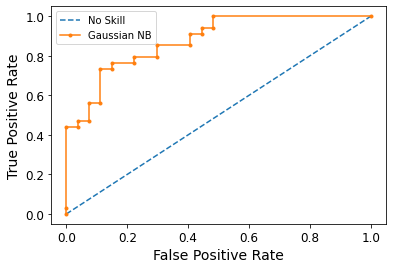

In [46]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# keep probabilities for the positive outcome only
GNB_probs = probs_log1[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
GNB_auc = roc_auc_score(y_test, GNB_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Gaussian Naive Bayes: ROC AUC=%.3f' % (GNB_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
GNB_fpr, GNB_tpr, _ = roc_curve(y_test, GNB_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(GNB_fpr, GNB_tpr, marker='.', label='Gaussian NB')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend

pyplot.legend()

# show the plot
pyplot.show()

In [47]:
print("Accuracy Score:", clf.score(X_test,y_test))

Accuracy Score: 0.7704918032786885


In [48]:
from sklearn.metrics import precision_recall_fscore_support

y_pred=clf.predict(X_test)
print(y_pred)

[0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0.]


In [49]:
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.768888888888889, 0.7636165577342048, 0.7653846153846153, None)

# Analysis Results

AUC-ROC curve is presented above with ROC AUC=0.852 for Gaussian Naive Bayes:
Accuracy Score: 0.77
Precision: 0.77
Recall: 0.76
F-score: 0.77